### Data Reading 

In [177]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [140]:
import pandas as pd

In [141]:
df = pd.read_csv("german_credit_data.csv")

In [142]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


### Data  Preprocessing

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [144]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [145]:
df.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [146]:
df["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [147]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [148]:
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [149]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [150]:
df["Risk"].unique()

array(['good', 'bad'], dtype=object)

In [151]:
def house(t):
    if t == "free":
        return 0
    elif t == "rent":
        return 1
    elif t == "own":
        return 2

df["Housing"] = df["Housing"].apply(house)

In [152]:
def Account(acc):
    if acc == "little":
        return 1
    elif acc == "moderate":
        return 2
    elif acc == "quite rich":
        return 3
    elif acc == "rich":
        return 4
    else:
        return 0

df["Saving accounts"] = df["Saving accounts"].apply(Account)
df["Checking account"] = df["Checking account"].apply(Account)

In [153]:
def gender(text):
    if text == "male":
        return 0
    elif text == "female":
        return 1
    
df["Sex"] = df["Sex"].apply(gender)

In [154]:
def purpose(data):
    if data == "radio/TV":
        return 1
    elif data == "education":
        return 2
    elif data == "furniture/equipment":
        return 3
    elif data == "business":
        return 4
    if data == "domestic appliances":
        return 5
    elif data == "repairs":
        return 6
    elif data == "vacation/others":
        return 7
    else:
        return 0

df["Purpose"] = df["Purpose"].apply(purpose)

In [155]:
def risk(d):
    if d == "good":
        return 0
    elif d == "bad":
        return 1
    

df["Risk"] = df["Risk"].apply(risk)

In [156]:
df.rename(columns={
    'Saving accounts': 'saving_accounts'
    ,'Checking account': 'checking_account'
    ,'Credit amount': 'credit_amount'}, inplace=True)

In [157]:
df

,Unnamed: 0,Age,Sex,Job,Housing,saving_accounts,checking_account,credit_amount,Duration,Purpose,Risk
0,0,67,0,2,2,0,1,1169,6,1,0
1,1,22,1,2,2,1,2,5951,48,1,1
2,2,49,0,1,2,1,0,2096,12,2,0
3,3,45,0,2,0,1,1,7882,42,3,0
4,4,53,0,2,0,1,1,4870,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1,2,1,0,1736,12,3,0
996,996,40,0,3,2,1,1,3857,30,0,0
997,997,38,0,2,2,1,0,804,12,1,0
998,998,23,0,2,0,1,1,1845,45,1,1


### Data Visualization 

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Sex               1000 non-null   int64
 3   Job               1000 non-null   int64
 4   Housing           1000 non-null   int64
 5   saving_accounts   1000 non-null   int64
 6   checking_account  1000 non-null   int64
 7   credit_amount     1000 non-null   int64
 8   Duration          1000 non-null   int64
 9   Purpose           1000 non-null   int64
 10  Risk              1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


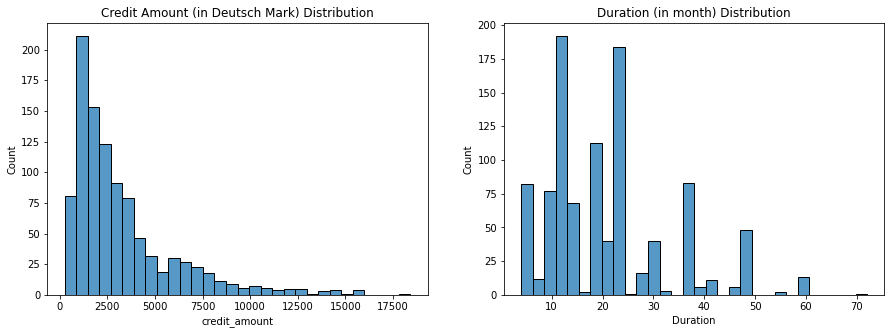

In [186]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='credit_amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

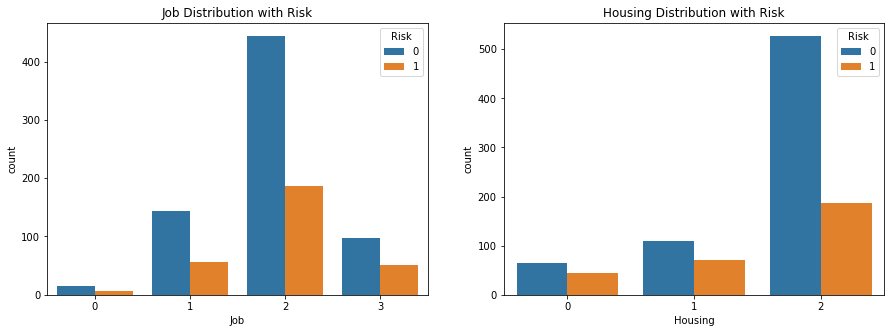

In [187]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

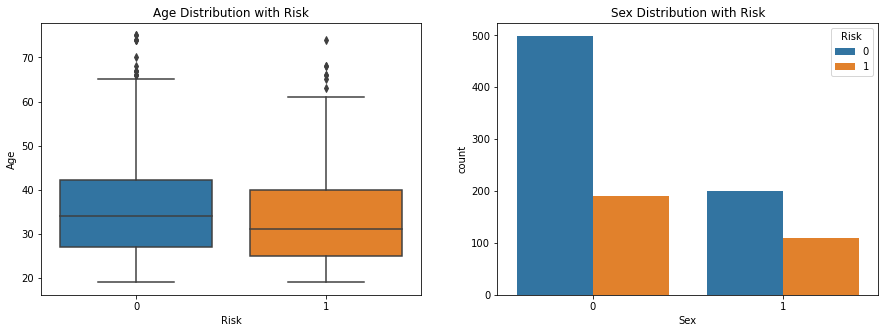

In [188]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

### Linear Regression 

In [158]:

Features = ['Age', 'Sex', 'Job', 'Housing', 'saving_accounts', 
   'checking_account', 'Duration', 'Purpose', 'Risk'] 
Target = 'credit_amount'

X = pd.get_dummies(df[Features], drop_first=True)
y = df[Target]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
credit_lm = LinearRegression()
credit_lm.fit(train_X, train_y)
print('intercept ', credit_lm.intercept_)
# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 
                    'coefficient': credit_lm.coef_}))

intercept  -1006.6182569011576
          Predictor  coefficient
0               Age    13.193068
1               Sex  -172.734964
2               Job   832.126955
3           Housing  -226.243649
4   saving_accounts  -176.318484
5  checking_account   -34.854619
6          Duration   137.054826
7           Purpose   -22.940737
8              Risk   129.951377


In [160]:
# print performance measures (training data)
regressionSummary(train_y, credit_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2137.9386
            Mean Absolute Error (MAE) : 1503.7095
          Mean Percentage Error (MPE) : -35.4846
Mean Absolute Percentage Error (MAPE) : 64.1596


In [161]:
pred_y = credit_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, credit_lm))
print('AIC : ', AIC_score(train_y, pred_y, credit_lm))
print('BIC : ', BIC_score(train_y, pred_y, credit_lm))

adjusted r2 :  0.42879406907226425
AIC :  10925.843085477585
BIC :  10974.209311684963


In [162]:
# Use predict() to make predictions on a new set
credit_lm_pred = credit_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': credit_lm_pred, 
                       'Actual': valid_y, 
                       'Residual': valid_y - credit_lm_pred})
print(result.head(20))

       Predicted  Actual     Residual
507  3249.267195    6850  3600.732805
818  6166.792717   15857  9690.207283
452  2053.229896    2759   705.770104
368  5543.187018    3446 -2097.187018
242  7471.679204    4605 -2866.679204
929  1373.808149    1344   -29.808149
262  4220.526833    5302  1081.473167
810  1306.816070     907  -399.816070
318  2049.784496     701 -1348.784496
49   1670.899512    2073   402.100488
446  5333.729717    1842 -3491.729717
142  4859.854612    3416 -1443.854612
968  6547.352932    7166   618.647068
345  1624.151544    1459  -165.151544
971  3053.320677    7393  4339.679323
133  3499.556039    1984 -1515.556039
104  2419.069693    2445    25.930307
6    3595.919138    2835  -760.919138
600  1316.516792    2329  1012.483208
496  6218.874630    9034  2815.125370


0.595


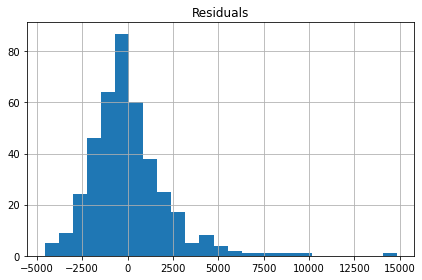

In [163]:
credit_lm_pred = credit_lm.predict(valid_X)
all_residuals = valid_y - credit_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [164]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj           AIC    Age  Duration  Housing    Job  Purpose   Risk    Sex  \
0  1  0.385469  10961.789511  False      True    False  False    False  False  False   
1  2  0.421767  10926.255752  False      True    False   True    False  False  False   
2  3  0.425701  10923.154202  False      True     True   True    False  False  False   
3  4  0.429046  10920.641448   True      True    False   True    False  False  False   
4  5  0.431210  10919.354359   True      True     True   True    False  False  False   
5  6  0.430972  10920.594064   True      True     True   True    False  False   True   
6  7  0.430340  10922.247663   True      True     True   True    False   True   True   
7  8  0.429584  10924.028742   True      True     True   True    False   True   True   
8  9  0.428794  10925.843085   True      True     True   True     True   True   True   

   checking_account  saving_accounts  
0             False            False  
1             False            False  
2 

### Backward Elimination

In [165]:
def train_model(variables):
  model = LinearRegression()
  model.fit(train_X[variables], train_y)
  return model

def score_model(model, variables):
  return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)



Variables: Age, Sex, Job, Housing, saving_accounts, checking_account, Duration, Purpose, Risk
Start: score=10925.84
Step: score=10924.03, remove Purpose
Step: score=10922.25, remove checking_account
Step: score=10920.59, remove Risk
Step: score=10919.35, remove Sex
Step: score=10919.35, remove None
['Age', 'Job', 'Housing', 'saving_accounts', 'Duration']


In [166]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 60.8994
       Root Mean Squared Error (RMSE) : 2142.0491
            Mean Absolute Error (MAE) : 1484.9243
          Mean Percentage Error (MPE) : -29.0982
Mean Absolute Percentage Error (MAPE) : 61.1708


### Forward Selection

In [167]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age, Sex, Job, Housing, saving_accounts, checking_account, Duration, Purpose, Risk
Start: score=11252.93, constant
Step: score=10961.79, add Duration
Step: score=10926.26, add Job
Step: score=10923.15, add Housing
Step: score=10920.76, add saving_accounts
Step: score=10919.35, add Age
Step: score=10919.35, add None
['Duration', 'Job', 'Housing', 'saving_accounts', 'Age']


### lasso Linear Regression 

In [168]:
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)



Regression statistics

                      Mean Error (ME) : 48.2346
       Root Mean Squared Error (RMSE) : 2136.3460
            Mean Absolute Error (MAE) : 1484.3829
          Mean Percentage Error (MPE) : -30.5998
Mean Absolute Percentage Error (MAPE) : 61.4351

Regression statistics

                      Mean Error (ME) : 42.8151
       Root Mean Squared Error (RMSE) : 2132.9477
            Mean Absolute Error (MAE) : 1478.4014
          Mean Percentage Error (MPE) : -31.7925
Mean Absolute Percentage Error (MAPE) : 61.1327
Lasso-CV chosen regularization:  2.0602890459647005
[   9.50869157  -92.52297291  781.95884755 -190.53600154 -139.07270902
   -0.          134.36210237   -0.           10.37797819]


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

In [169]:
linearRegression = LinearRegression(normalize=True).fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 52.7409
       Root Mean Squared Error (RMSE) : 2142.0845
            Mean Absolute Error (MAE) : 1491.6791
          Mean Percentage Error (MPE) : -29.4304
Mean Absolute Percentage Error (MAPE) : 61.8453


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [170]:
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_})

,features,linear regression,lassoCV
0,Age,13.193068,9.508692
1,Sex,-172.734964,-92.522973
2,Job,832.126955,781.958848
3,Housing,-226.243649,-190.536002
4,saving_accounts,-176.318484,-139.072709
5,checking_account,-34.854619,-0.000000
6,Duration,137.054826,134.362102
7,Purpose,-22.940737,-0.000000
8,Risk,129.951377,10.377978


In [173]:
# run a linear regression of credit_amount
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'credit_amount ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     50.96
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.51e-68
Time:                        11:52:39   Log-Likelihood:                -5451.9
No. Observations:                 600   AIC:                         1.092e+04
Df Residuals:                     590   BIC:                         1.097e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1006.6183    552.014  